In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from datetime import date

In [13]:
clim = pd.read_csv('sample_data/jena_climate_2009_2016.csv')


In [ ]:
clim

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [15]:
def Sequential_Input_LSTM(df, input_sequence):
    df_np = df.to_numpy()
    X = []
    y = []

    for i in range(len(df_np) - input_sequence):
        row = [a for a in df_np[i:i + input_sequence]]
        X.append(row)
        label = df_np[i + input_sequence]
        y.append(label)

    return np.array(X), np.array(y)

In [16]:
n_input = 10

In [17]:
df = clim[['Date Time','T (degC)']].rename(columns = {'T (degC)':'T','Date Time':'datetime'})

In [19]:
df_hour_lvl = df[5::6].reset_index().drop('index', axis=1)

In [23]:
def Sequential_Input_LSTM(df, input_sequence):
    df_np = df.to_numpy()
    X = []
    y = []

    for i in range(len(df_np) - input_sequence):
        row = [a for a in df_np[i:i + input_sequence]]
        X.append(row)
        label = df_np[i + input_sequence]
        y.append(label)

    return np.array(X), np.array(y)


n_input = 10

df_min_model_data = df_hour_lvl['T']

X, y = Sequential_Input_LSTM(df_min_model_data, n_input)

In [24]:
X_train, y_train = X[:60000], y[:60000]

In [25]:
X_val, y_val = X[60000:65000], y[60000:65000]

In [26]:
X_test, y_test = X[65000:], y[65000:]

In [36]:
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [38]:
n_features = 1

model1 = Sequential()

model1.add(InputLayer((n_input,n_features)))
model1.add(LSTM(100, return_sequences = True))
model1.add(LSTM(100, return_sequences = True))
model1.add(LSTM(50))
model1.add(Dense(8, activation = 'relu'))
model1.add(Dense(1, activation = 'linear'))

model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 10, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 10, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,817 (593.04 KB)

 Trainable params: 151,817 (593.04 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

model1.compile(loss = MeanSquaredError(),
               optimizer = Adam(learning_rate = 0.0001),
               metrics = [RootMeanSquaredError()])

model1.fit(X_train, y_train,
           validation_data = (X_val, y_val),
           epochs = 50,
           callbacks = [early_stop])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 28ms/step - loss: 54.2724 - root_mean_squared_error: 7.1375 - val_loss: 1.0664 - val_root_mean_squared_error: 1.0327
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - loss: 2.3334 - root_mean_squared_error: 1.5207 - val_loss: 0.5645 - val_root_mean_squared_error: 0.7513
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 0.9153 - root_mean_squared_error: 0.9562 - val_loss: 0.4847 - val_root_mean_squared_error: 0.6962
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - loss: 0.7103 - root_mean_squared_error: 0.8428 - val_loss: 0.4795 - val_root_mean_squared_error: 0.6925
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - loss: 0.6761 - root_mean_squared_error: 0.8220 - val_loss: 0.4994 - val_root_mean_squared_error: 0.7067
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 29ms/step - loss: 0.6316 - root_mean_squared_error: 0.7947 - val_loss: 0.4815 - val_root_mean_squared_error: 0.6939


<Axes: >

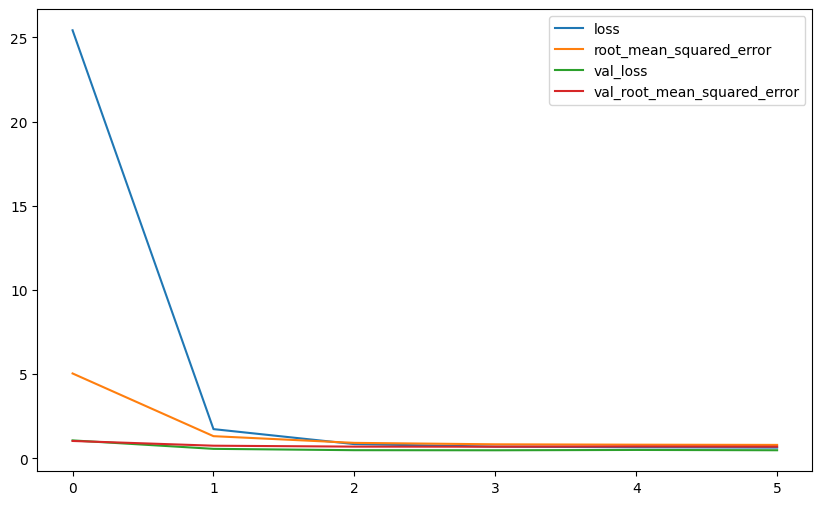

In [41]:
losses_df1 = pd.DataFrame(model1.history.history)

losses_df1.plot(figsize = (10,6))

In [42]:
# save the model
save_model(model1, "LSTM_Models/lstm_univariate.h5")

# load the model
model1 = load_model('LSTM_Models/lstm_univariate.h5')

In [43]:
test_predictions1 = model1.predict(X_test).flatten()


X_test_list = []
for i in range(len(X_test)):
    X_test_list.append(X_test[i][0])


test_predictions_df1 = pd.DataFrame({'X_test':list(X_test_list),
                                    'LSTM Prediction':list(test_predictions1)})

159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step


<Axes: >

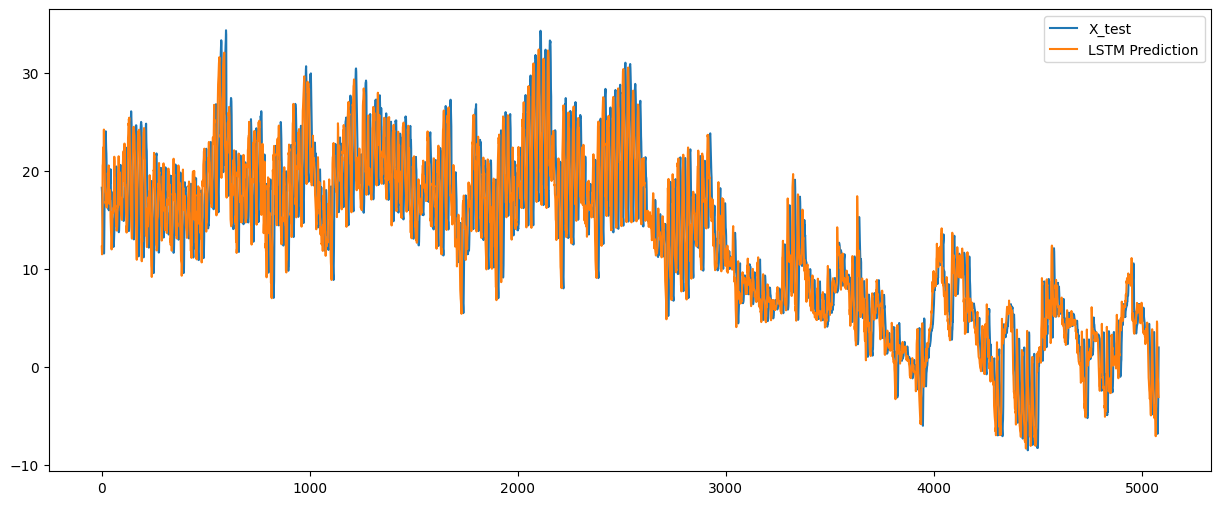

In [44]:
test_predictions_df1.plot(figsize = (15,6))

<Axes: >

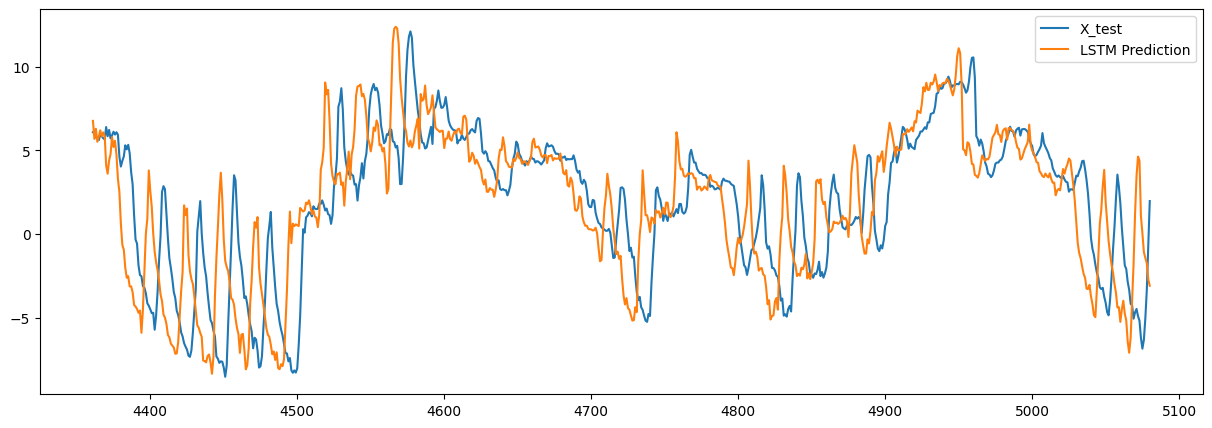

In [45]:
test_predictions_df1[(len(X_test) - 720):].plot(figsize = (15,5))